# Data Mining and Machine Learning - Project

## Detecting Difficulty Level of French Texts

### Step by step guidelines

The following are a set of step by step guidelines to help you get started with your project for the Data Mining and Machine Learning class. 

#### 1. 📂 Create a public GitHub repository for your team using this naming convention `DMML2021_[your_team_name]` with the following structure:
- data (subfolder) 
- code (subfolder) 
- documentation (subfolder)
- a readme file (.md): *mention team name, participants, brief description of the project, approach and summary of results table.*

All team members should contribute to the GitHub repository.

#### 2. 🇰 Join the competititon on Kaggle using an invitation link like this one: https://www.kaggle.com/t/69884669004b482c96dd59e5d0c52044 

Under the Team tab, save your team name (`UNIL_your_team_name`) and make sure your team members join in as well. You can merge your user account with your teammates in order to create a team.

#### 3. 📓 Read the data into your colab notebook. There should be one code notebook per team, but all team members can participate and contribute code. 

You can use either direct the Kaggle API and your Kaggle credentials (as explained below and **entirely optional**), or dowload the data form Kaggle and upload it onto your team's GitHub repository under the data subfolder.

#### 4. 💎 Train your models and upload the code under your team's GitHub repo. Set the `random_state=0`.
- baseline
- logistic regression with TFidf vectoriser (simple, no data cleaning)
- KNN & hyperparameter optimisation (simple, no data cleaning)
- Decision Tree classifier & hyperparameter optimisation (simple, no data cleaning)
- Random Forests classifier (simple, no data cleaning)
- another technique or combination of techniques of your choice

#### 5. 🎥 Create a YouTube video (10-15 minutes) of your solution and embed it in your notebook. Explain the algorithms used and the evaluation of your solutions. All projects will also be presented live by the group during the last class.

DONE

### Submission details (one per team)
1. Add the link to your team's GitHub repository here: https://moodle.unil.ch/mod/url/view.php?id=841193

2. Download a ZIPped file of your team's repositiory and submit it in Moodle here: https://moodle.unil.ch/mod/assign/view.php?id=1194395

3. Post a link to your video in Slack under the project channel.

### Grading (one per team)
- 5 points presentation
- 5 points video 
- 10 points notebook quality 
- 10 points your solution

## Some further details for points 3 and 4 above.

### 3. Read data into your notebook with the Kaggle API (entirely optional). 

You can also download the data from Kaggle and put it in your team's repo the data folder.

In [196]:
# reading in the data via the Kaggle API: optional

# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [197]:
# install Kaggle
! pip install kaggle

Log into your Kaggle account, go to Account > API > Create new API token. You will obtain a kaggle.json file, which you save on your Google Drive directy in my drive.

In [198]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [199]:
#read in your Kaggle credentials from Google Drive
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json


In [200]:
# download the dataset from the competition page
! kaggle competitions download -c detecting-the-difficulty-level-of-french-texts

training_data.csv: Skipping, found more recently modified local copy (use --force to force download)
unlabelled_test_data.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [201]:
# Import required packages
!python -m spacy download fr_core_news_sm
#import fr_core_news_sm
import spacy
from spacy import displacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

     |████████████████████████████████| 14.7 MB 12.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [202]:
# Import additional packages
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr.examples import sentences 
from spacy.lang.fr import French
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [203]:
# read in your training data
import pandas as pd
import numpy as np

df = pd.read_csv('/content/training_data.csv', index_col=0)

In [204]:
df.head()

,sentence,difficulty
id,,
0,Les coûts kilométriques réels peuvent diverger...,C1
1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,Le test de niveau en français est sur le site ...,A1
3,Est-ce que ton mari est aussi de Boston?,A1
4,"Dans les écoles de commerce, dans les couloirs...",B1


Have a look at the data on which to make predictions.

In [205]:
df_pred = pd.read_csv('/content/unlabelled_test_data.csv', index_col=0)
df_pred.head()

,sentence
id,
0,Nous dûmes nous excuser des propos que nous eû...
1,Vous ne pouvez pas savoir le plaisir que j'ai ...
2,"Et, paradoxalement, boire froid n'est pas la b..."
3,"Ce n'est pas étonnant, car c'est une saison my..."
4,"Le corps de Golo lui-même, d'une essence aussi..."


And this is the format for your submissions.

In [206]:
df_example_submission = pd.read_csv('/content/sample_submission.csv', index_col=0)
df_example_submission.head()

,difficulty
id,
0,A1
1,A1
2,A1
3,A1
4,A1


### 4. Train your models

Set your X and y variables. 
Set the `random_state=0`
Split the data into a train and test set using the following parameters `train_test_split(X, y, test_size=0.2, random_state=0)`.

#### 4.1.Baseline
What is the baseline for this classification problem? (you can use the highest label frequency from the entire training data, the df above)

In [207]:
# Select features
X = df['sentence'] # the features we want to analyze
ylabels = df['difficulty'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=0, stratify=ylabels)

X_train

id
183     Vous attendîtes la surprise que vos parents vo...
90                      Le petit chat a plu à mes parents
1128    Pourfendeur des sciences et des arts, fossoyeu...
2336    un berger est une personne chargée de guider e...
4398    Pendant les trois années d'études, je vivais d...
                              ...                        
3983    La Corse est une petite île au sud de la Franc...
1870                             Ma mère s'appelle Marie.
394     Le journaliste lui a posé des questions auxque...
3244    Les sentiments de l'homme sont confus et mélan...
411     Il n'engendre aucun mouvement alternatif, ce q...
Name: sentence, Length: 3840, dtype: object

In [208]:
np.random.seed = 0

In [209]:
from sklearn.dummy import DummyClassifier

# instantiate with the "most frequent" parameter
dummy = DummyClassifier(strategy='most_frequent')

# fit it as if we had no X features to train it on
dummy.fit(None, y_train)

#compute test baseline and store it for later
baseline = dummy.score(None, y_test)
baseline

0.16979166666666667

#### 4.2. Logistic Regression (without data cleaning)

Train a simple logistic regression model using a Tfidf vectoriser.

In [210]:
#Vectorization Feature Engineering (TF-IDF)
#tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer) # we use the above defined tokenizer 
tfidf_vector = TfidfVectorizer()                           
# Define classifier
classifier = LogisticRegression(multi_class="multinomial")

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(multi_class='multinomial'))])

Calculate accuracy, precision, recall and F1 score on the test set.

In [211]:
# Predictions
y_pred = pipe.predict(X_test)
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred) :.4f}")
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred, average=None)
f1= f1_score(y_test, y_pred, average=None)

print("Precision:\t {0:4f}".format(precision_score(y_test, y_pred,average="macro"))) 
print("Recall:\t {0:4f}".format(recall_score(y_test, y_pred, average="macro")))
print("F1_Score:\t {0:4f}".format(f1_score(y_test, y_pred, average="macro")))

ACCURACY SCORE:
0.4604
Precision:	 0.457754
Recall:	 0.459464
F1_Score:	 0.455442


Have a look at the confusion matrix and identify a few examples of sentences that are not well classified.

In [212]:
# your code here
print(f'CONFUSION MATRIX:\n{confusion_matrix(y_test, y_pred)}')

CONFUSION MATRIX:
[[104  27  17   7   5   3]
 [ 36  65  36   7   7   8]
 [ 24  37  54  16  11  17]
 [  3   4  13  66  28  44]
 [  1   5   7  34  59  54]
 [  8   6  10  14  29  94]]


Generate your first predictions on the `unlabelled_test_data.csv`. make sure your predictions match the format of the `unlabelled_test_data.csv`.

In [213]:
My_pred = pipe.predict(df_pred['sentence'])
My_pred

array(['C2', 'B1', 'A1', ..., 'C2', 'C1', 'B2'], dtype=object)

#### 4.3. KNN (without data cleaning)

Train a KNN classification model using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [214]:
# Define classifier
from sklearn.neighbors import KNeighborsClassifier
#tfidf_vector = TfidfVectorizer()
knn = KNeighborsClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', knn)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [215]:
# Evaluate the model
def evaluate(test, pred):
  precision = precision_score(test, pred,average=None)
  recall = recall_score(test, pred, average=None)
  f1= f1_score(test, pred, average=None)
  print(f'CONFUSION MATRIX:\n{confusion_matrix(test, pred)}')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:')
  print("Precision:\t {0:4f}".format(precision_score(test, pred,average="macro"))) 
  print("Recall:\t {0:4f}".format(recall_score(test, pred, average="macro")))
  print("F1_Score:\t {0:4f}".format(f1_score(test, pred, average="macro")))

In [216]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[129  23   8   1   0   2]
 [ 86  58  12   3   0   0]
 [ 97  43  14   3   1   1]
 [ 38  36  31  30  12  11]
 [ 50  33  19  19  28  11]
 [ 45  26  22  12  12  44]]
ACCURACY SCORE:
0.3156
CLASSIFICATION REPORT:
Precision:	 0.382327
Recall:	 0.313734
F1_Score:	 0.291315


Try to improve it by tuning the hyper parameters (`n_neighbors`,   `p`, `weights`).

In [217]:
# your code here
#tfidf_vector = TfidfVectorizer()
knn = KNeighborsClassifier(n_neighbors=35, p=2, weights='uniform')
# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', knn)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=35))])

In [218]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[109  37  13   0   3   1]
 [ 77  54  23   1   0   4]
 [ 62  50  37   5   1   4]
 [ 23  22  31  33  15  34]
 [ 22  29  20  16  24  49]
 [ 16  30  18  10  14  73]]
ACCURACY SCORE:
0.3438
CLASSIFICATION REPORT:
Precision:	 0.371288
Recall:	 0.342219
F1_Score:	 0.326032


#### 4.4. Decision Tree Classifier (without data cleaning)

Train a Decison Tree classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [219]:
# your code here
from sklearn.tree import DecisionTreeClassifier
#tfidf_vector = TfidfVectorizer()
tree = DecisionTreeClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', tree)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [220]:
# Predictions
y_pred = pipe.predict(X_test)
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred) :.4f}")
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred, average=None)
f1= f1_score(y_test, y_pred, average=None)

print("Precision:\t {0:4f}".format(precision_score(y_test, y_pred,average="macro"))) 
print("Recall:\t {0:4f}".format(recall_score(y_test, y_pred, average="macro")))
print("F1_Score:\t {0:4f}".format(f1_score(y_test, y_pred, average="macro")))

ACCURACY SCORE:
0.2917
Precision:	 0.288122
Recall:	 0.290906
F1_Score:	 0.288422


Try to improve it by tuning the hyper parameters (`max_depth`, the depth of the decision tree).

In [221]:
# your code here
# Define parameter to test
#tfidf_vector = TfidfVectorizer()
grid = {'max_depth':np.arange(1,3)}

tree = DecisionTreeClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', tree)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

In [222]:
# Predictions
y_pred = pipe.predict(X_test)
print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_pred) :.4f}")
precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred, average=None)
f1= f1_score(y_test, y_pred, average=None)

print("Precision:\t {0:4f}".format(precision_score(y_test, y_pred,average="macro"))) 
print("Recall:\t {0:4f}".format(recall_score(y_test, y_pred, average="macro")))
print("F1_Score:\t {0:4f}".format(f1_score(y_test, y_pred, average="macro")))

ACCURACY SCORE:
0.3208
Precision:	 0.316368
Recall:	 0.320182
F1_Score:	 0.317226


#### 4.5. Random Forest Classifier (without data cleaning)

Try a Random Forest Classifier, using a Tfidf vectoriser. Show the accuracy, precision, recall and F1 score on the test set.

In [223]:
# your code here
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', random_forest)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [224]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[124  26   9   3   1   0]
 [ 66  53  23  10   5   2]
 [ 40  58  35  14   9   3]
 [ 11  19  24  54  31  19]
 [ 18  13  12  44  43  30]
 [ 18  10  24  23  32  54]]
ACCURACY SCORE:
0.3781
CLASSIFICATION REPORT:
Precision:	 0.373262
Recall:	 0.376687
F1_Score:	 0.363747


#### 4.6. Any other technique, including data cleaning if necessary

Try to improve accuracy by training a better model using the techniques seen in class, or combinations of them.

As usual, show the accuracy, precision, recall and f1 score on the test set.

In [225]:
from sklearn.linear_model import RidgeClassifier
Ridge_Class = KNeighborsClassifier()

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', Ridge_Class)])

# Fit model on training set
pipe.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier())])

In [226]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluation - test set
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[129  23   8   1   0   2]
 [ 86  58  12   3   0   0]
 [ 97  43  14   3   1   1]
 [ 38  36  31  30  12  11]
 [ 50  33  19  19  28  11]
 [ 45  26  22  12  12  44]]
ACCURACY SCORE:
0.3156
CLASSIFICATION REPORT:
Precision:	 0.382327
Recall:	 0.313734
F1_Score:	 0.291315


In [227]:
# your code here
# Select features
X = df['sentence'] # the features we want to analyze
ylabels = df['difficulty'] # the labels, or answers, we want to test against

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=0, stratify=ylabels)

X_train

id
183     Vous attendîtes la surprise que vos parents vo...
90                      Le petit chat a plu à mes parents
1128    Pourfendeur des sciences et des arts, fossoyeu...
2336    un berger est une personne chargée de guider e...
4398    Pendant les trois années d'études, je vivais d...
                              ...                        
3983    La Corse est une petite île au sud de la Franc...
1870                             Ma mère s'appelle Marie.
394     Le journaliste lui a posé des questions auxque...
3244    Les sentiments de l'homme sont confus et mélan...
411     Il n'engendre aucun mouvement alternatif, ce q...
Name: sentence, Length: 3840, dtype: object

In [228]:
# we use ridge regression with built in cross validation
# by default sklearn does leave-one-out cross validation
#from sklearn.linear_model import RidgeCV
#ridge = RidgeCV(fit_intercept=False, cv=5)
#ridge.fit(X_train, y_train)

#### 4.7. Show a summary of your results

In [229]:
# your code here
# Create a list of punctuation marks
punctuations = string.punctuation
# Create a list of stopwords
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

# Load French language model
import fr_core_news_sm
sp = fr_core_news_sm.load()

# Create tokenizer function
def spacy_tokenizer(sentence):
    # Create token object, which is used to create documents with linguistic annotations.
    mytokens = sp(sentence)

    # Lemmatize each token and convert each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]
    ## alternative way
    # mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Remove stop words and punctuation
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # Return preprocessed list of tokens
    return mytokens

In [230]:
spacy_tokenizer("Les coûts kilométriques réels peuvent diverger sensiblement des valeurs moyennes en fonction du moyen de transport utilisé,")

['coût',
 'kilométrique',
 'réel',
 'pouvoir',
 'diverger',
 'sensiblemer',
 'valeur',
 'moyenner',
 'fonction',
 'moyen',
 'transport',
 'utiliser']

In [231]:
%%time
# Define vectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), tokenizer=spacy_tokenizer)

# Define classifier
classifier = LogisticRegression(solver='lbfgs', max_iter=1000)

# Create pipeline
pipe = Pipeline([('vectorizer', tfidf),
                 ('classifier', classifier)])

# Fit model on training set
pipe.fit(X_train, y_train)

CPU times: user 59.3 s, sys: 200 ms, total: 59.5 s
Wall time: 59.5 s


0.399


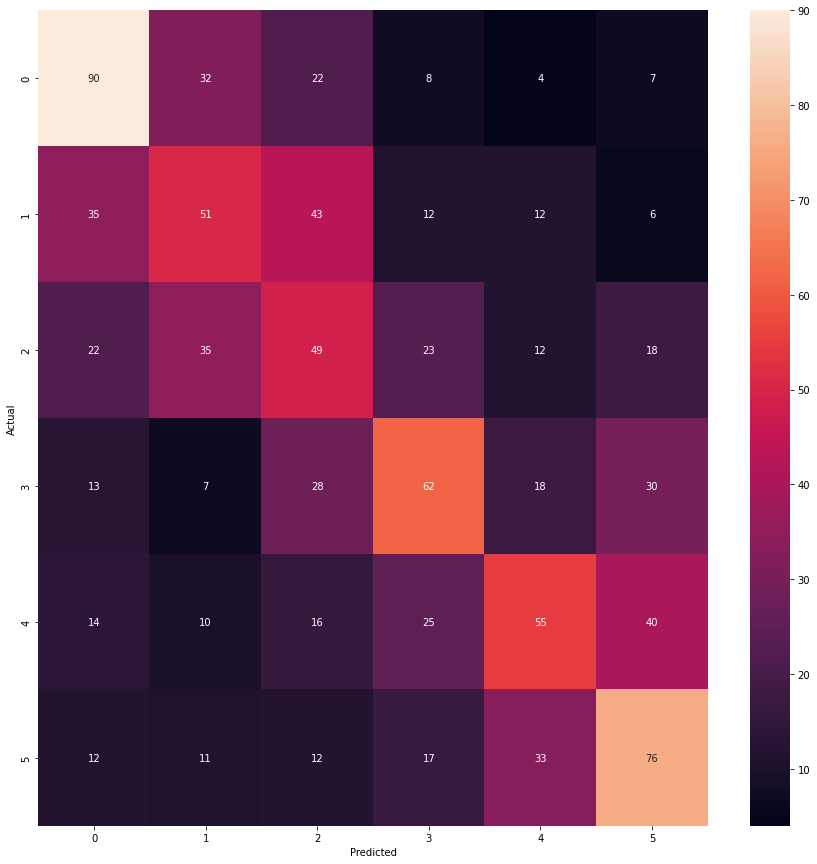

In [232]:
# Predictions
y_pred = pipe.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [233]:
df.head

<bound method NDFrame.head of                                                sentence difficulty
id                                                                
0     Les coûts kilométriques réels peuvent diverger...         C1
1     Le bleu, c'est ma couleur préférée mais je n'a...         A1
2     Le test de niveau en français est sur le site ...         A1
3              Est-ce que ton mari est aussi de Boston?         A1
4     Dans les écoles de commerce, dans les couloirs...         B1
...                                                 ...        ...
4795  C'est pourquoi, il décida de remplacer les hab...         B2
4796  Il avait une de ces pâleurs splendides qui don...         C1
4797  Et le premier samedi de chaque mois, venez ren...         A2
4798  Les coûts liés à la journalisation n'étant pas...         C2
4799  Sur le sable, la mer haletait de toute la resp...         C2

[4800 rows x 2 columns]>

autres tests

In [234]:
df_new=df
for i in range(0,df.shape[0]):
  df_new['sentence'][i]=spacy_tokenizer(df['sentence'][i])
#df['sentence'][1]
#spacy_tokenizer(df['sentence'][1])

In [235]:
df_new.head
df.head

<bound method NDFrame.head of                                                sentence difficulty
id                                                                
0     [coût, kilométrique, réel, pouvoir, diverger, ...         C1
1                 [bleu, couleur, préférer, aime, vert]         A1
2       [test, niveau, français, site, internet, école]         A1
3                                        [mari, boston]         A1
4     [école, commerce, couloir, place, financier, a...         B1
...                                                 ...        ...
4795  [décider, remplacer, habituel, porte, automati...         B2
4796  [pâleur, splendide, donner, chose, majesté, ma...         C1
4797  [samedi, mois, venir, rencontrer, conducteur, ...         A2
4798  [coût, lier, journalisation, négligeable, capa...         C2
4799  [sable, mer, haleter, respiration, rapide, éto...         C2

[4800 rows x 2 columns]>

In [236]:
%%time
from gensim.models.doc2vec import TaggedDocument
sample_tagged = df_new.apply(lambda r: TaggedDocument(words=spacy_tokenizer(r['sentence']), tags=[r.difficulty]), axis=1)
print(sample_tagged.head(20))

TypeError: ignored

In [237]:
# Train test split - same split as before
train_tagged, test_tagged = train_test_split(sample_tagged, test_size=0.2, random_state=1234)

train_tagged

id
1320    ([biologist, militant, passionner, pédagogie, ...
1374    ([épidémie, coronavirus, contraindre, éprouver...
3502                                     ([rapide], [A1])
1613    ([croire, devoir, interdire, al, revenir, volo...
462          ([débattais, intérieuremer, indigner], [C2])
                              ...                        
664     ([tomber, piège, l'"addiction, anxiété, génére...
3276                ([pleuvoir, attendre, autobus], [A1])
1318    ([choc, pétrolier, plonger, france, crise], [C1])
723     ([faire, philosophie, intonation, alsacien], [...
2863                 ([petit, révolution, chiffre], [B1])
Length: 3840, dtype: object

In [238]:
# Allows to speed up a bit
import multiprocessing
cores = multiprocessing.cpu_count()

In [239]:
# Define Doc2Vec and build vocabulary
from gensim.models import Doc2Vec

model_dbow = Doc2Vec(dm=0, vector_size=30, negative=6, hs=0, min_count=1, sample=0, workers=cores, epoch=300)
model_dbow.build_vocab([x for x in train_tagged.values])

In [240]:
# Train distributed Bag of Word model
model_dbow.train(train_tagged, total_examples=model_dbow.corpus_count, epochs=model_dbow.epochs)

In [241]:
#Select X and y
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=100)) for doc in sents])
    return targets, regressors

y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

0.4198


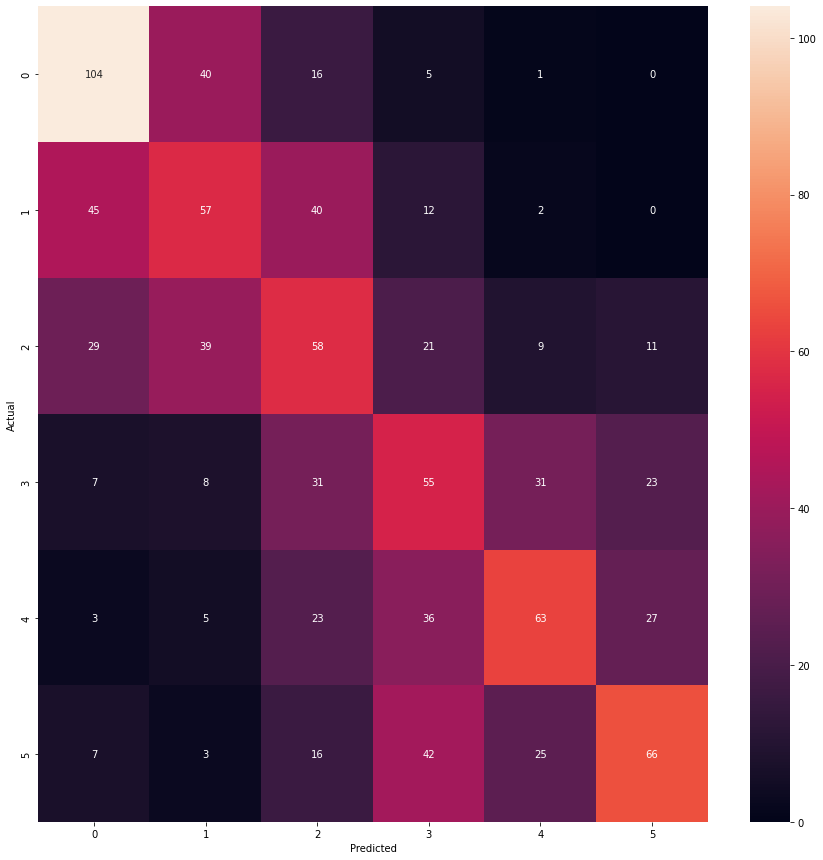

In [242]:
# Fit model on training set - same algorithm as before
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Evaluate model
print(round(accuracy_score(y_test, y_pred), 4))
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [243]:
# Fit model on training set
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

In [244]:
# Print accuracy on test set 
evaluate(y_test, y_pred)
#we have an accuracy of 0.7333

CONFUSION MATRIX:
[[104  40  16   5   1   0]
 [ 45  57  40  12   2   0]
 [ 29  39  58  21   9  11]
 [  7   8  31  55  31  23]
 [  3   5  23  36  63  27]
 [  7   3  16  42  25  66]]
ACCURACY SCORE:
0.4198
CLASSIFICATION REPORT:
Precision:	 0.424298
Recall:	 0.418400
F1_Score:	 0.418876
